# Speed distribution across F1 circuits

This is extrapolating from the speed distribution example notebook.

In [121]:
# Load packages

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

import fastf1 as ff1

In [122]:
# Define commonly-used variables

year = 2024
ses = 'Q'
colormap = mpl.cm.plasma

In [123]:
# Load session data
def fastest_quali_lap(race, driver):
  session = ff1.get_session(year, race, ses)
  weekend = session.event
  session.load()
  lap = session.laps.pick_driver(driver).pick_fastest()
  
  return lap.telemetry['Speed']

season = {}

season['Bahrain'] = fastest_quali_lap('Bahrain', 'VER')
season['Saudi Arabia'] = fastest_quali_lap('Saudi Arabia', 'VER')
season['Australia'] = fastest_quali_lap('Australia', 'VER')
season['Japan'] = fastest_quali_lap('Japan', 'VER')
season['China'] = fastest_quali_lap('China', 'VER')
season['Miami'] = fastest_quali_lap('Miami', 'VER')
season['Imola'] = fastest_quali_lap('Imola', 'VER')
season['Monaco'] = fastest_quali_lap('Monaco', 'LEC')
season['Canada'] = fastest_quali_lap('Canada', 'RUS')
season['Barcelona'] = fastest_quali_lap('Barcelona', 'NOR')
season['Austria'] = fastest_quali_lap('Austria', 'VER')
season['Great Britain'] = fastest_quali_lap('Silverstone', 'RUS')
season['Hungary'] = fastest_quali_lap('Hungary', 'NOR')
season['Belgium'] = fastest_quali_lap('Belgium', 'VER')
season['Netherlands'] = fastest_quali_lap('Netherlands', 'NOR')
season['Italy'] = fastest_quali_lap('Italy', 'NOR')
season['Azerbaijan'] = fastest_quali_lap('Azerbaijan', 'LEC')
season['Singapore'] = fastest_quali_lap('Singapore', 'NOR')
season['United States'] = fastest_quali_lap('United States', 'NOR')
season['Mexico'] = fastest_quali_lap('Mexico', 'SAI')
season['Brazil'] = fastest_quali_lap('Brazil', 'NOR')
season['Las Vegas'] = fastest_quali_lap('Las Vegas', 'RUS')
season['Qatar'] = fastest_quali_lap('Qatar', 'VER')
season['Abu Dhabi'] = fastest_quali_lap('Abu Dhabi', 'NOR')

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule
events      WARNING 	Correcting user input 'Bahrain' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['4', '63', '22', '3

In [124]:
# sorted(season, key=np.mean(season))
np.mean(season['Bahrain'])

np.float64(175.33492381649904)

In [125]:
type(season)

dict

In [127]:
average_speeds = {race: speeds.mean() for race, speeds in season.items()}
sorted_races = sorted(season.keys(), key=lambda race: average_speeds[race])
sorted_df = pd.DataFrame({race: season[race] for race in sorted_races})

In [128]:
type(sorted_df)

pandas.core.frame.DataFrame

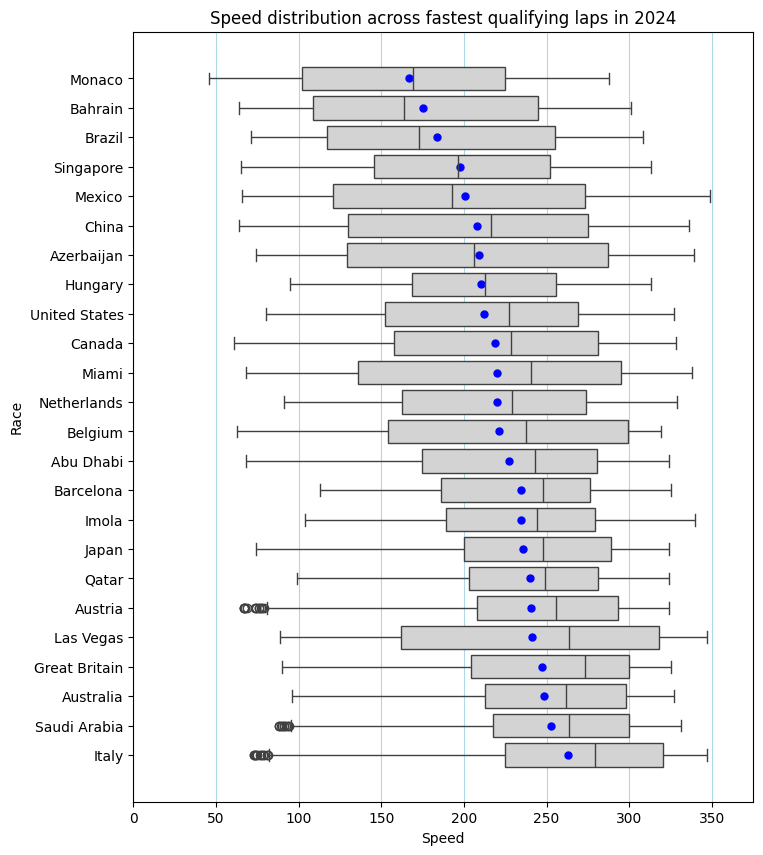

In [129]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 10))

sns.boxplot(
  data=sorted_df,
  orient="h",
  ax=ax1,
  color="lightgray"
)

ax1.set_title('Speed distribution across fastest qualifying laps in 2024')
ax1.set_xlim((0, 375))
ax1.grid(color='lightblue', which='major', axis='x')
ax1.set_xlabel('Speed')
ax1.set_ylabel('Race')

for i, race in enumerate(sorted_races):
  mean_speed = average_speeds[race]
  ax1.plot(mean_speed, i, 'bo', markersize=5)
plt.show()

---

This is the end of the notebook.